### First we make explicit the installation of libraries we will use and the importing.

In [16]:
!pip3 install -q --upgrade pip
!pip3 install -q pandas numpy matplotlib seaborn openpyxl climateserv requests netCDF4 xarray pyproj statsmodels

In [21]:
import sys
from pathlib import Path

# Calculate the path to the scripts folder relative to the current notebook.
scripts_dir = Path("../../").resolve()

# Add the scripts directory to the sys.path if it's not already there.
if str(scripts_dir) not in sys.path:
    sys.path.append(str(scripts_dir))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
# Assuming the CSV file is named "data.csv" and is located in the same directory as the notebook
df = pd.read_csv("../../data/processed_data/wells_data_gambia_for_machine_learning.csv")

# Delete the column Date
#df = df.drop(columns=['Date'])


In [19]:
missing_values = df.isnull().sum()
missing_values

ID                                           0
GROUNDWATER_LEVEL                            0
Day                                          0
Month                                        0
Year                                         0
Latitude                                     0
Longitude                                    0
Ground surface elevation                     0
LIS_Soil_Moisture_Combined                   0
LIS_Streamflow                               0
LIS_ET                                       0
Date                                         0
MOD13Q1_061__250m_16_days_EVI                0
MOD13Q1_061__250m_16_days_MIR_reflectance    0
MOD13Q1_061__250m_16_days_NDVI               0
NASA_IMERG_Late                              0
DepthToGroundwater                           0
Curvatu_tif2                                 0
Drainage_density                             0
Slope_tif2                                   0
Hydrogeo                                     0
NASADEM_HGT  

In [20]:
for column_name, dtype in df.dtypes.items():
    print(f"Column '{column_name}' has data type: {dtype}")
df

Column 'ID' has data type: object
Column 'GROUNDWATER_LEVEL' has data type: float64
Column 'Day' has data type: int64
Column 'Month' has data type: int64
Column 'Year' has data type: int64
Column 'Latitude' has data type: float64
Column 'Longitude' has data type: float64
Column 'Ground surface elevation' has data type: float64
Column 'LIS_Soil_Moisture_Combined' has data type: float64
Column 'LIS_Streamflow' has data type: float64
Column 'LIS_ET' has data type: float64
Column 'Date' has data type: object
Column 'MOD13Q1_061__250m_16_days_EVI' has data type: float64
Column 'MOD13Q1_061__250m_16_days_MIR_reflectance' has data type: float64
Column 'MOD13Q1_061__250m_16_days_NDVI' has data type: float64
Column 'NASA_IMERG_Late' has data type: float64
Column 'DepthToGroundwater' has data type: object
Column 'Curvatu_tif2' has data type: float64
Column 'Drainage_density' has data type: float64
Column 'Slope_tif2' has data type: float64
Column 'Hydrogeo' has data type: float64
Column 'NASADEM

,ID,GROUNDWATER_LEVEL,Day,Month,Year,Latitude,Longitude,Ground surface elevation,LIS_Soil_Moisture_Combined,LIS_Streamflow,...,MOD13Q1_061__250m_16_days_EVI,MOD13Q1_061__250m_16_days_MIR_reflectance,MOD13Q1_061__250m_16_days_NDVI,NASA_IMERG_Late,DepthToGroundwater,Curvatu_tif2,Drainage_density,Slope_tif2,Hydrogeo,NASADEM_HGT
0,NWP00001,14.26,14,4,2016,13.420804,-16.716666,19.47,0.172124,0.059371,...,0.2113,0.3972,0.2564,0.0,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
1,NWP00001,13.82,26,12,2015,13.420804,-16.716666,19.47,0.210837,0.136391,...,0.2443,0.1787,0.4064,1.3,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
2,NWP00001,13.82,25,12,2015,13.420804,-16.716666,19.47,0.211614,0.138738,...,0.2443,0.1787,0.4064,0.0,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
3,NWP00001,13.83,24,12,2015,13.420804,-16.716666,19.47,0.212448,0.141231,...,0.2443,0.1787,0.4064,0.1,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
4,NWP00001,13.83,23,12,2015,13.420804,-16.716666,19.47,0.213260,0.143826,...,0.2443,0.1787,0.4064,0.0,0-7,-6.480000e+09,57.568844,2.785167,5.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,NWP21002,16.85,5,1,2015,13.240281,-16.713889,21.68,0.232334,0.085506,...,0.1795,0.2054,0.3419,0.5,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0
6632,NWP21002,16.79,4,1,2015,13.240281,-16.713889,21.68,0.232903,0.086226,...,0.1795,0.2054,0.3419,0.1,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0
6633,NWP21002,16.82,3,1,2015,13.240281,-16.713889,21.68,0.233475,0.086970,...,0.1795,0.2054,0.3419,0.0,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0
6634,NWP21002,16.82,2,1,2015,13.240281,-16.713889,21.68,0.234051,0.087731,...,0.1795,0.2054,0.3419,0.0,7-25,-1.296000e+09,69.201469,2.321531,5.0,25.0


# MACHINE LEARNING TECHNIQUES

In [22]:
# Display unique values before mapping
print("Unique values before mapping:")
print(df['DepthToGroundwater'].unique())

# Mapping each unique string in 'DepthToGroundwater' to an integer
unique_values = df['DepthToGroundwater'].unique()
value_to_int = {value: idx for idx, value in enumerate(unique_values)}

# Apply the mapping to the column
df['DepthToGroundwater'] = df['DepthToGroundwater'].map(value_to_int)

# Display unique values after mapping
print("Unique values after mapping:")
print(df['DepthToGroundwater'].unique())

Unique values before mapping:
['0-7' '25-50' '7-25']
Unique values after mapping:
[0 1 2]


In [26]:
# Unique IDs
unique_ids = df['ID'].unique()

# Split IDs into train and test sets
train_ids, test_ids = train_test_split(unique_ids, test_size=0.1, random_state=42)

# Print IDs used for training and testing
print(f"Training IDs: {train_ids}")
print(f"Testing IDs: {test_ids}")

# Split the dataframe based on IDs
train_df = df[df['ID'].isin(train_ids)]
test_df = df[df['ID'].isin(test_ids)]

# Print the length of rows used for train and test
print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in testing set: {len(test_df)}")

# Features and target, excluding the 'Date' column
X_train = train_df.drop(columns=['GROUNDWATER_LEVEL', 'ID', 'Date'])
y_train = train_df['GROUNDWATER_LEVEL']
X_test = test_df.drop(columns=['GROUNDWATER_LEVEL', 'ID', 'Date'])
y_test = test_df['GROUNDWATER_LEVEL']

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Performance metrics
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

print(f'MAE: {mae}, MSE: {mse}, R² Score: {r2}')

Training IDs: ['NWP58001' 'NWP23001' 'NWP58002' 'NWP43001' 'NWP22003' 'NWP13001'
 'NWP20006' 'NWP33001' 'NWP00001' 'NWP20004' 'NWP20009' 'NWP54001'
 'NWP20024' 'NWP20005' 'NWP20003' 'NWP24001' 'NWP20008' 'NWP61001'
 'NWP50001' 'NWP45001' 'NWP40001' 'NWP20023' 'NWP58011' 'NWP20002'
 'NWP62002' 'NWP62001' 'NWP27001' 'NWP20007' 'NWP54002' 'NWP22002'
 'NWP20025' 'NWP60001']
Testing IDs: ['NWP21002' 'NWP51001' 'NWP35001' 'NWP31001']
Number of rows in training set: 4968
Number of rows in testing set: 1668
MAE: 4.86283633093525, MSE: 32.73896390389687, R² Score: -1.1228836945069522


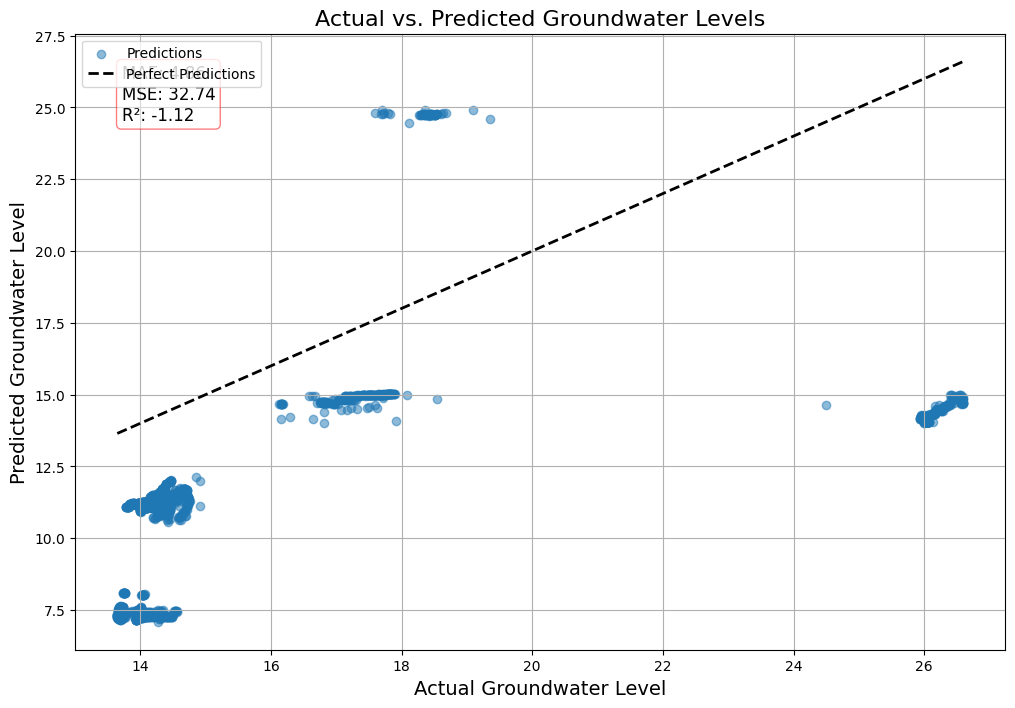

In [28]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create scatter plot
plt.scatter(y_test, y_pred, alpha=0.5, label='Predictions')

# Plot the line for perfect predictions
perfect_predictions = [y_test.min(), y_test.max()]
plt.plot(perfect_predictions, perfect_predictions, 'k--', lw=2, label='Perfect Predictions')

# Annotate the plot with MAE, MSE, and R² Score
plt.text(x=0.05, y=0.95, s=f'MAE: {mae:.2f}\nMSE: {mse:.2f}\nR²: {r2:.2f}',
         fontsize=12, ha='left', va='top', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', alpha=0.5))

# Label the axes and title
plt.xlabel('Actual Groundwater Level', fontsize=14)
plt.ylabel('Predicted Groundwater Level', fontsize=14)
plt.title('Actual vs. Predicted Groundwater Levels', fontsize=16)

# Add gridlines and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

